<a href="https://colab.research.google.com/github/Sanjanah8/python/blob/Machine-Learning/Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRICE PREDICTION**

# Load Dataset

In [2]:
import pandas as pd

# Load the dataset
file_path = 'bhp.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
df.head()

# Check the statistics of the 'price_per_sqft' column
df['price_per_sqft'].describe()


,price_per_sqft
count,1.320000e+04
mean,7.920337e+03
std,1.067272e+05
min,2.670000e+02
25%,4.267000e+03
50%,5.438000e+03
75%,7.317000e+03
max,1.200000e+07


# Remove outliers using percentile

In [3]:
# Calculate the lower and upper bounds using the percentile technique
lower_bound = df['price_per_sqft'].quantile(0.001)
upper_bound = df['price_per_sqft'].quantile(0.999)

# Filter the dataset to remove outliers
df_filtered = df[(df['price_per_sqft'] > lower_bound) & (df['price_per_sqft'] < upper_bound)]

# Display the new dataframe's statistics
df_filtered['price_per_sqft'].describe()


,price_per_sqft
count,13172.000000
mean,6663.653735
std,4141.020700
min,1379.000000
25%,4271.000000
50%,5438.000000
75%,7311.000000
max,50349.000000


# Remove outliers using standard deviation

In [4]:
# Calculate mean and standard deviation of the filtered data
mean = df_filtered['price_per_sqft'].mean()
std_dev = df_filtered['price_per_sqft'].std()

# Define the lower and upper bounds using 4 standard deviations
lower_bound_std = mean - 4 * std_dev
upper_bound_std = mean + 4 * std_dev

# Filter the data to remove outliers
df_filtered_std = df_filtered[(df_filtered['price_per_sqft'] > lower_bound_std) & (df_filtered['price_per_sqft'] < upper_bound_std)]

# Display the new dataframe's statistics
df_filtered_std['price_per_sqft'].describe()


,price_per_sqft
count,13047.000000
mean,6449.328045
std,3487.670005
min,1379.000000
25%,4259.000000
50%,5415.000000
75%,7222.000000
max,23214.000000


# Histogram and bell curve

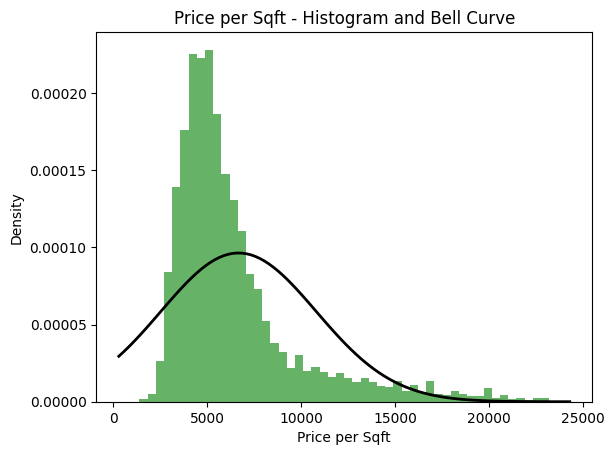

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Plot histogram
plt.hist(df_filtered_std['price_per_sqft'], bins=50, density=True, alpha=0.6, color='g')

# Plot bell curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Price per Sqft - Histogram and Bell Curve')
plt.xlabel('Price per Sqft')
plt.ylabel('Density')
plt.show()


# Remove outliers using z score

In [6]:
from scipy import stats

# Calculate the Z-scores
z_scores = stats.zscore(df_filtered['price_per_sqft'])

# Filter data using Z-score
df_filtered_zscore = df_filtered[(z_scores > -4) & (z_scores < 4)]

# Display the new dataframe's statistics
df_filtered_zscore['price_per_sqft'].describe()


,price_per_sqft
count,13047.000000
mean,6449.328045
std,3487.670005
min,1379.000000
25%,4259.000000
50%,5415.000000
75%,7222.000000
max,23214.000000
